In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import pathlib
import cv2

In [5]:
from google.colab import drive

In [6]:
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
data_url="/content/drive/MyDrive/PlantVillage"

In [8]:
data_url=pathlib.Path(data_url)

In [14]:
data={"Potato___Early_blight":list(data_url.glob("Potato___Early_blight/*")),
      "Potato___Late_blight":list(data_url.glob("Potato___Late_blight/*")),
      "Potato___healthy":list(data_url.glob("Potato___healthy/*"))
      }

In [15]:
len(data["Potato___healthy"])

162

In [16]:
len(data["Potato___Early_blight"])

1000

In [17]:
len(data["Potato___Late_blight"])

1000

In [18]:
data_index={"Potato___healthy":0,
            "Potato___Early_blight":1,
            "Potato___Late_blight":2}

In [22]:
import PIL

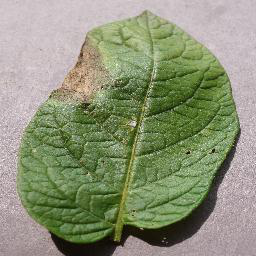

In [23]:
PIL.Image.open(data["Potato___Late_blight"][0])

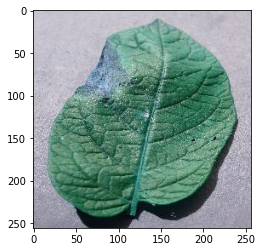

In [24]:
plt.imshow(cv2.imread(str(data["Potato___Late_blight"][0])))

In [26]:
x,y=[],[]
for name,li in data.items():
  for l in li:
    img_arr=cv2.imread(str(l))
    img_res=cv2.resize(img_arr,(224,224))
    x.append(img_res)
    y.append(data_index[name])

In [27]:
x=np.array(x)
y=np.array(y)

In [28]:
x=x/255

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [31]:
import tensorflow_hub as hub

In [32]:
model=keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/feature_vector/1",input_shape=(224,224,3)),
        keras.layers.Dense(3,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
48/48 [==============================] - 41s 111ms/step - loss: 0.4775 - accuracy: 0.8136
Epoch 2/10
48/48 [==============================] - 5s 97ms/step - loss: 0.1459 - accuracy: 0.9603
Epoch 3/10
48/48 [==============================] - 5s 98ms/step - loss: 0.0916 - accuracy: 0.9775
Epoch 4/10
48/48 [==============================] - 5s 98ms/step - loss: 0.0676 - accuracy: 0.9881
Epoch 5/10
48/48 [==============================] - 5s 99ms/step - loss: 0.0522 - accuracy: 0.9927
Epoch 6/10
48/48 [==============================] - 5s 97ms/step - loss: 0.0469 - accuracy: 0.9941
Epoch 7/10
48/48 [==============================] - 5s 98ms/step - loss: 0.0363 - accuracy: 0.9967
Epoch 8/10
48/48 [==============================] - 5s 98ms/step - loss: 0.0307 - accuracy: 0.9974
Epoch 9/10
48/48 [==============================] - 5s 99ms/step - loss: 0.0248 - accuracy: 0.9993
Epoch 10/10
48/48 [==============================] - 5s 99ms/step - loss: 0.0222 - accuracy: 0.9993


In [33]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 3s 98ms/step - loss: 0.0603 - accuracy: 0.9846


[0.0603238008916378, 0.9845916628837585]

In [34]:
y_predict=model.predict(x_test)

In [38]:
y_pred=[]
for i in y_predict:
  y_pred.append(np.argmax(i))
  

In [41]:
from sklearn import metrics

In [42]:
metrics.accuracy_score(y_test,y_pred)

0.9845916795069337

In [43]:
import seaborn as sb

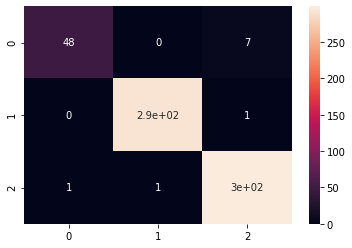

In [44]:
sb.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)